In [5]:
# Test rotated Cl using the perturbative method, now only works for BB for the anisotropic rotation

In [1]:
# import necessary modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from classy import Class
from math import pi
mpl.rcParams['font.size']=13.5

In [2]:
def setup_axis(ax, xlabel=None, ylabel=None, xscale=None, yscale=None, 
               fs=18, title=None):
    if xlabel: ax.set_xlabel(xlabel, fontsize=fs)
    if ylabel: ax.set_ylabel(ylabel, fontsize=fs)
    if xscale: ax.set_xscale(xscale)
    if yscale: ax.set_yscale(yscale)
    if title:  ax.set_title(title, fontsize=fs)
    return ax

In [15]:
params = {
    "output" : " tCl, pCl, rCl" ,
    "l_max_scalars" : 4000,
    "rotation": 'yes',
    "alpha" : 0,
    "A_cb" : 1E-5 ,
}
cosmo = Class()
cosmo.set(params)
cosmo.compute(level=['rotation'])
rot_cl = cosmo.rotated_cl()

In [16]:
params_perturb = {
    "output" : " tCl, pCl, rCl" ,
    "l_max_scalars" : 4000,
    "rotation": 'yes',
    "perturb_rotation": 'yes',
    "alpha" : 0,
    "A_cb" : 1E-5 ,
}
cosmo = Class()
cosmo.set(params_perturb)
cosmo.compute(level=['rotation'])
rot_cl_perturb = cosmo.rotated_cl()

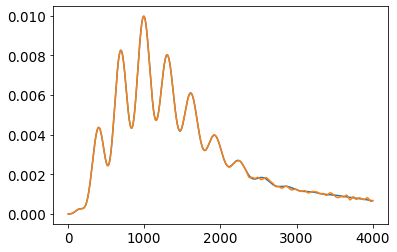

In [17]:
ells = rot_cl['ell']
factor = ells*(ells+1)/(2*pi)
plt.plot(ells[2:], 2.72e6**2*(factor*rot_cl['bb'])[2:])
plt.plot(ells[2:], 2.72e6**2*(factor*rot_cl_perturb['bb'])[2:])